Started on: Thu Oct 18 23:28 2018

### Problem Statement:

The goal is to create and train a machine learning model to predict the human judgement about who is more influential on social media. Each datapoint in a dataset describes two individuals, A and B. For each person, 11 pre-computed, non-negative numeric features based on twitter activity are provided. The binary label represents a human judgement about which one of the two individuals is more influential. A label '1' means A is more influential than B. 0 means B is more influential than A. 
That means it is a binary classification problem. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
#Loading data
filename = 'train.csv'
data = pd.read_csv(filename)

### Data Analysis

In [4]:
data.head()

,Choice,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,...,B_following_count,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3
0,0,228,302,3,0.583979,0.100503,0.100503,0.100503,0.362150,2,...,29808,1689,15.430498,3.984029,8.204331,0.332423,6.988815,66,75.530303,1916.893939
1,0,21591,1179,228,90.456506,25.798292,5.709329,1.111159,5.176620,369,...,848,1610,40.495021,8.943607,3.227677,0.564343,1.070321,163,132.030675,2931.515337
2,0,7310,1215,101,25.503644,9.556347,5.361519,0.591206,3.589718,95,...,482,206,0.734696,0.354379,0.603202,0.100503,0.603202,3,10.333333,277.333333
3,0,20,7,2,7.690824,0.277306,1.331508,0.100503,2.830627,6,...,17637,278,572.874856,390.293681,27.552040,7.167557,32.101906,1762,23.469296,1395.845634
4,1,45589,862,2641,148.854279,36.998884,27.881768,3.333492,23.861282,551,...,1711,181,21.601866,3.581661,6.764657,1.119727,4.563246,85,48.500000,1993.627907


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5500 entries, 0 to 5499
Data columns (total 23 columns):
Choice                 5500 non-null int64
A_follower_count       5500 non-null int64
A_following_count      5500 non-null int64
A_listed_count         5500 non-null int64
A_mentions_received    5500 non-null float64
A_retweets_received    5500 non-null float64
A_mentions_sent        5500 non-null float64
A_retweets_sent        5500 non-null float64
A_posts                5500 non-null float64
A_network_feature_1    5500 non-null int64
A_network_feature_2    5500 non-null float64
A_network_feature_3    5500 non-null float64
B_follower_count       5500 non-null int64
B_following_count      5500 non-null int64
B_listed_count         5500 non-null int64
B_mentions_received    5500 non-null float64
B_retweets_received    5500 non-null float64
B_mentions_sent        5500 non-null float64
B_retweets_sent        5500 non-null float64
B_posts                5500 non-null float64
B_network

Great!!! No missing data values. Now let's check for duplicate data points.

In [6]:
#Checking for duplicate entries
data.duplicated().sum()

132

In [7]:
#Droping duplicate entries
data=data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5368 entries, 0 to 5499
Data columns (total 23 columns):
Choice                 5368 non-null int64
A_follower_count       5368 non-null int64
A_following_count      5368 non-null int64
A_listed_count         5368 non-null int64
A_mentions_received    5368 non-null float64
A_retweets_received    5368 non-null float64
A_mentions_sent        5368 non-null float64
A_retweets_sent        5368 non-null float64
A_posts                5368 non-null float64
A_network_feature_1    5368 non-null int64
A_network_feature_2    5368 non-null float64
A_network_feature_3    5368 non-null float64
B_follower_count       5368 non-null int64
B_following_count      5368 non-null int64
B_listed_count         5368 non-null int64
B_mentions_received    5368 non-null float64
B_retweets_received    5368 non-null float64
B_mentions_sent        5368 non-null float64
B_retweets_sent        5368 non-null float64
B_posts                5368 non-null float64
B_network

It is always good to look at general statistics of the data

In [8]:
data.describe()

,Choice,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,...,B_following_count,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3
count,5368.000000,5.368000e+03,5.368000e+03,5368.000000,5.368000e+03,5368.000000,5368.000000,5368.000000,5368.000000,5368.000000,...,5368.000000,5368.000000,5.368000e+03,5368.000000,5368.000000,5368.000000,5368.000000,5368.000000,5368.000000,5368.000000
mean,0.509687,6.531546e+05,1.268433e+04,5964.257452,2.703850e+03,1044.594283,6.010116,1.110900,9.034317,5307.927906,...,12652.984911,5914.551043,2.591819e+03,1008.857731,6.111806,1.106489,9.477078,5306.139158,84.856233,3752.620368
std,0.499953,2.042057e+06,4.891607e+04,17492.766722,2.951678e+04,11084.712394,9.533824,1.916878,18.225719,29259.930714,...,49856.067279,16417.448299,2.538935e+04,9450.741429,9.755998,1.942058,19.317847,27063.933568,106.277355,5557.683473
min,0.000000,1.600000e+01,0.000000e+00,0.000000,1.005034e-01,0.100503,0.100503,0.100503,0.100503,0.000000,...,0.000000,0.000000,1.005034e-01,0.100503,0.100503,0.100503,0.100503,0.000000,0.000000,0.000000
25%,0.000000,2.687750e+03,3.217500e+02,85.000000,3.453649e+00,0.716816,0.359534,0.100503,0.625805,12.000000,...,322.000000,78.000000,3.277718e+00,0.716251,0.356943,0.100503,0.822584,11.000000,15.176568,1206.500000
50%,1.000000,4.558900e+04,7.790000e+02,932.000000,4.876542e+01,14.029113,2.291802,0.341936,3.467754,195.000000,...,771.000000,890.000000,4.853027e+01,14.029113,2.251398,0.341936,3.342999,190.000000,54.925234,2214.125820
75%,1.000000,3.927380e+05,2.838000e+03,6734.000000,3.498196e+02,118.704407,7.049859,1.320681,10.600502,1323.000000,...,2838.000000,6734.000000,3.743699e+02,107.081021,6.946233,1.318140,10.600502,1323.000000,109.728261,4345.216686
max,1.000000,3.654319e+07,1.165830e+06,549144.000000,1.145219e+06,435825.874241,76.809514,16.290540,193.072418,920838.000000,...,664324.000000,549144.000000,1.145219e+06,435825.874241,76.809514,16.290540,193.072418,920838.000000,1861.583333,75526.083333


Data appears to have wide range outliers. A simple boxplot of the data can confirm that. Also it is evident that, max feature values have different scales which suggest a requirement for data normalization.

(array([-5000000.,        0.,  5000000., 10000000., 15000000., 20000000.,
        25000000., 30000000., 35000000., 40000000.]),
 <a list of 10 Text yticklabel objects>)

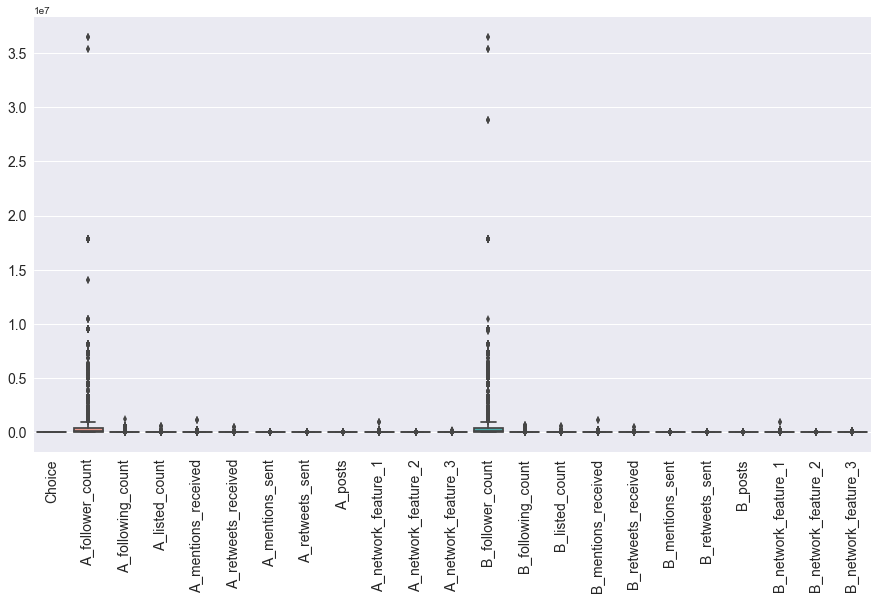

In [9]:
fig1, ax1 = plt.subplots(figsize=(15,8))
sns.boxplot(data, orient="v", ax=ax1)
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=14)


We can also check for a distribution of a single feature 

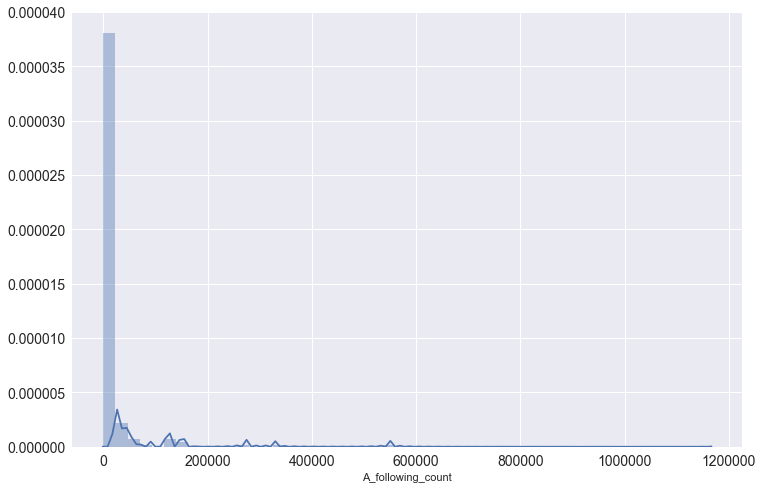

In [10]:
fig2 , ax2 = plt.subplots(figsize=(12,8))
sns.distplot(data['A_following_count'], ax=ax2)
plt.xticks(fontsize=14)
a=plt.yticks(fontsize=14)

In [11]:
# Defining a function for plotting data distribution 
def distribution_plots(h, w, X_train):
    fig3, ax3 = plt.subplots(h, w, sharex=True,figsize=(15,15))
    axes_list = [item for sublist in ax3 for item in sublist]
    for col in X_train.columns:
        ax=axes_list.pop(0)
        sns.distplot(X_train[col],ax=ax)
    
    for ax in axes_list:
        ax.remove() 

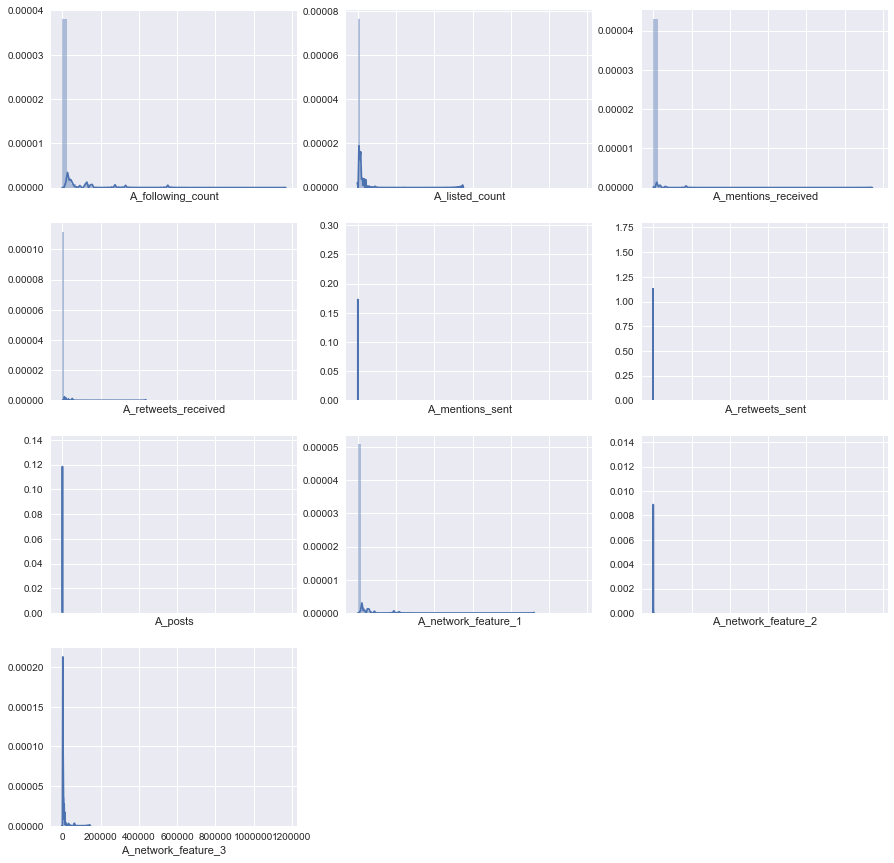

In [12]:
#Feature distribution for user A (Not showing follower count distribution shown above)  
distribution_plots(4, 3, data.iloc[:,2:12])

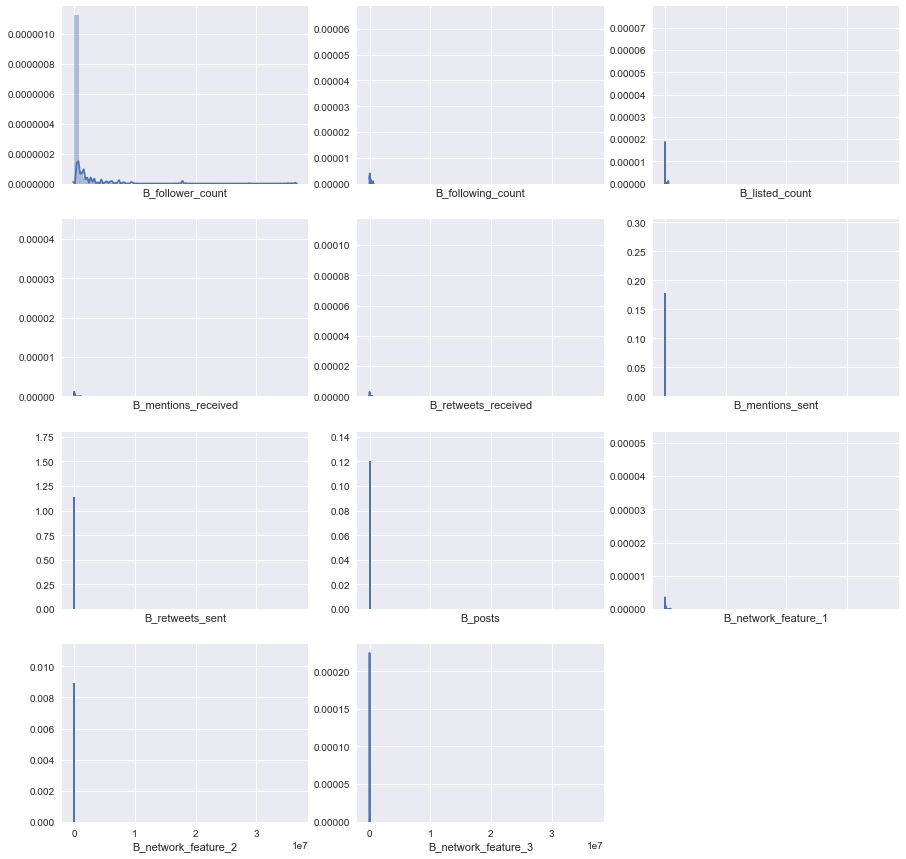

In [13]:
#Feature distribution for user B
distribution_plots(4,3, data.iloc[:,12:])


Most of these feature are heavily right skewed due to wide range outliers. This information is important for model selection, as most models ideally require normaly distributed data. One way to solve this is by removing outliers. But removal of any data points means loss of information and should always be avoided unless that data point is a mistake. It is definitely a possibility for a person to have a million followers or reweets. That means these outliers are proper observations.
Log transformation can be useful in this situation. But let's wait till we get the baseline performance.


It also useful to visualize a data in the most raw format. A quick look at a scatter plot can provide a useful information about relationships between features. 

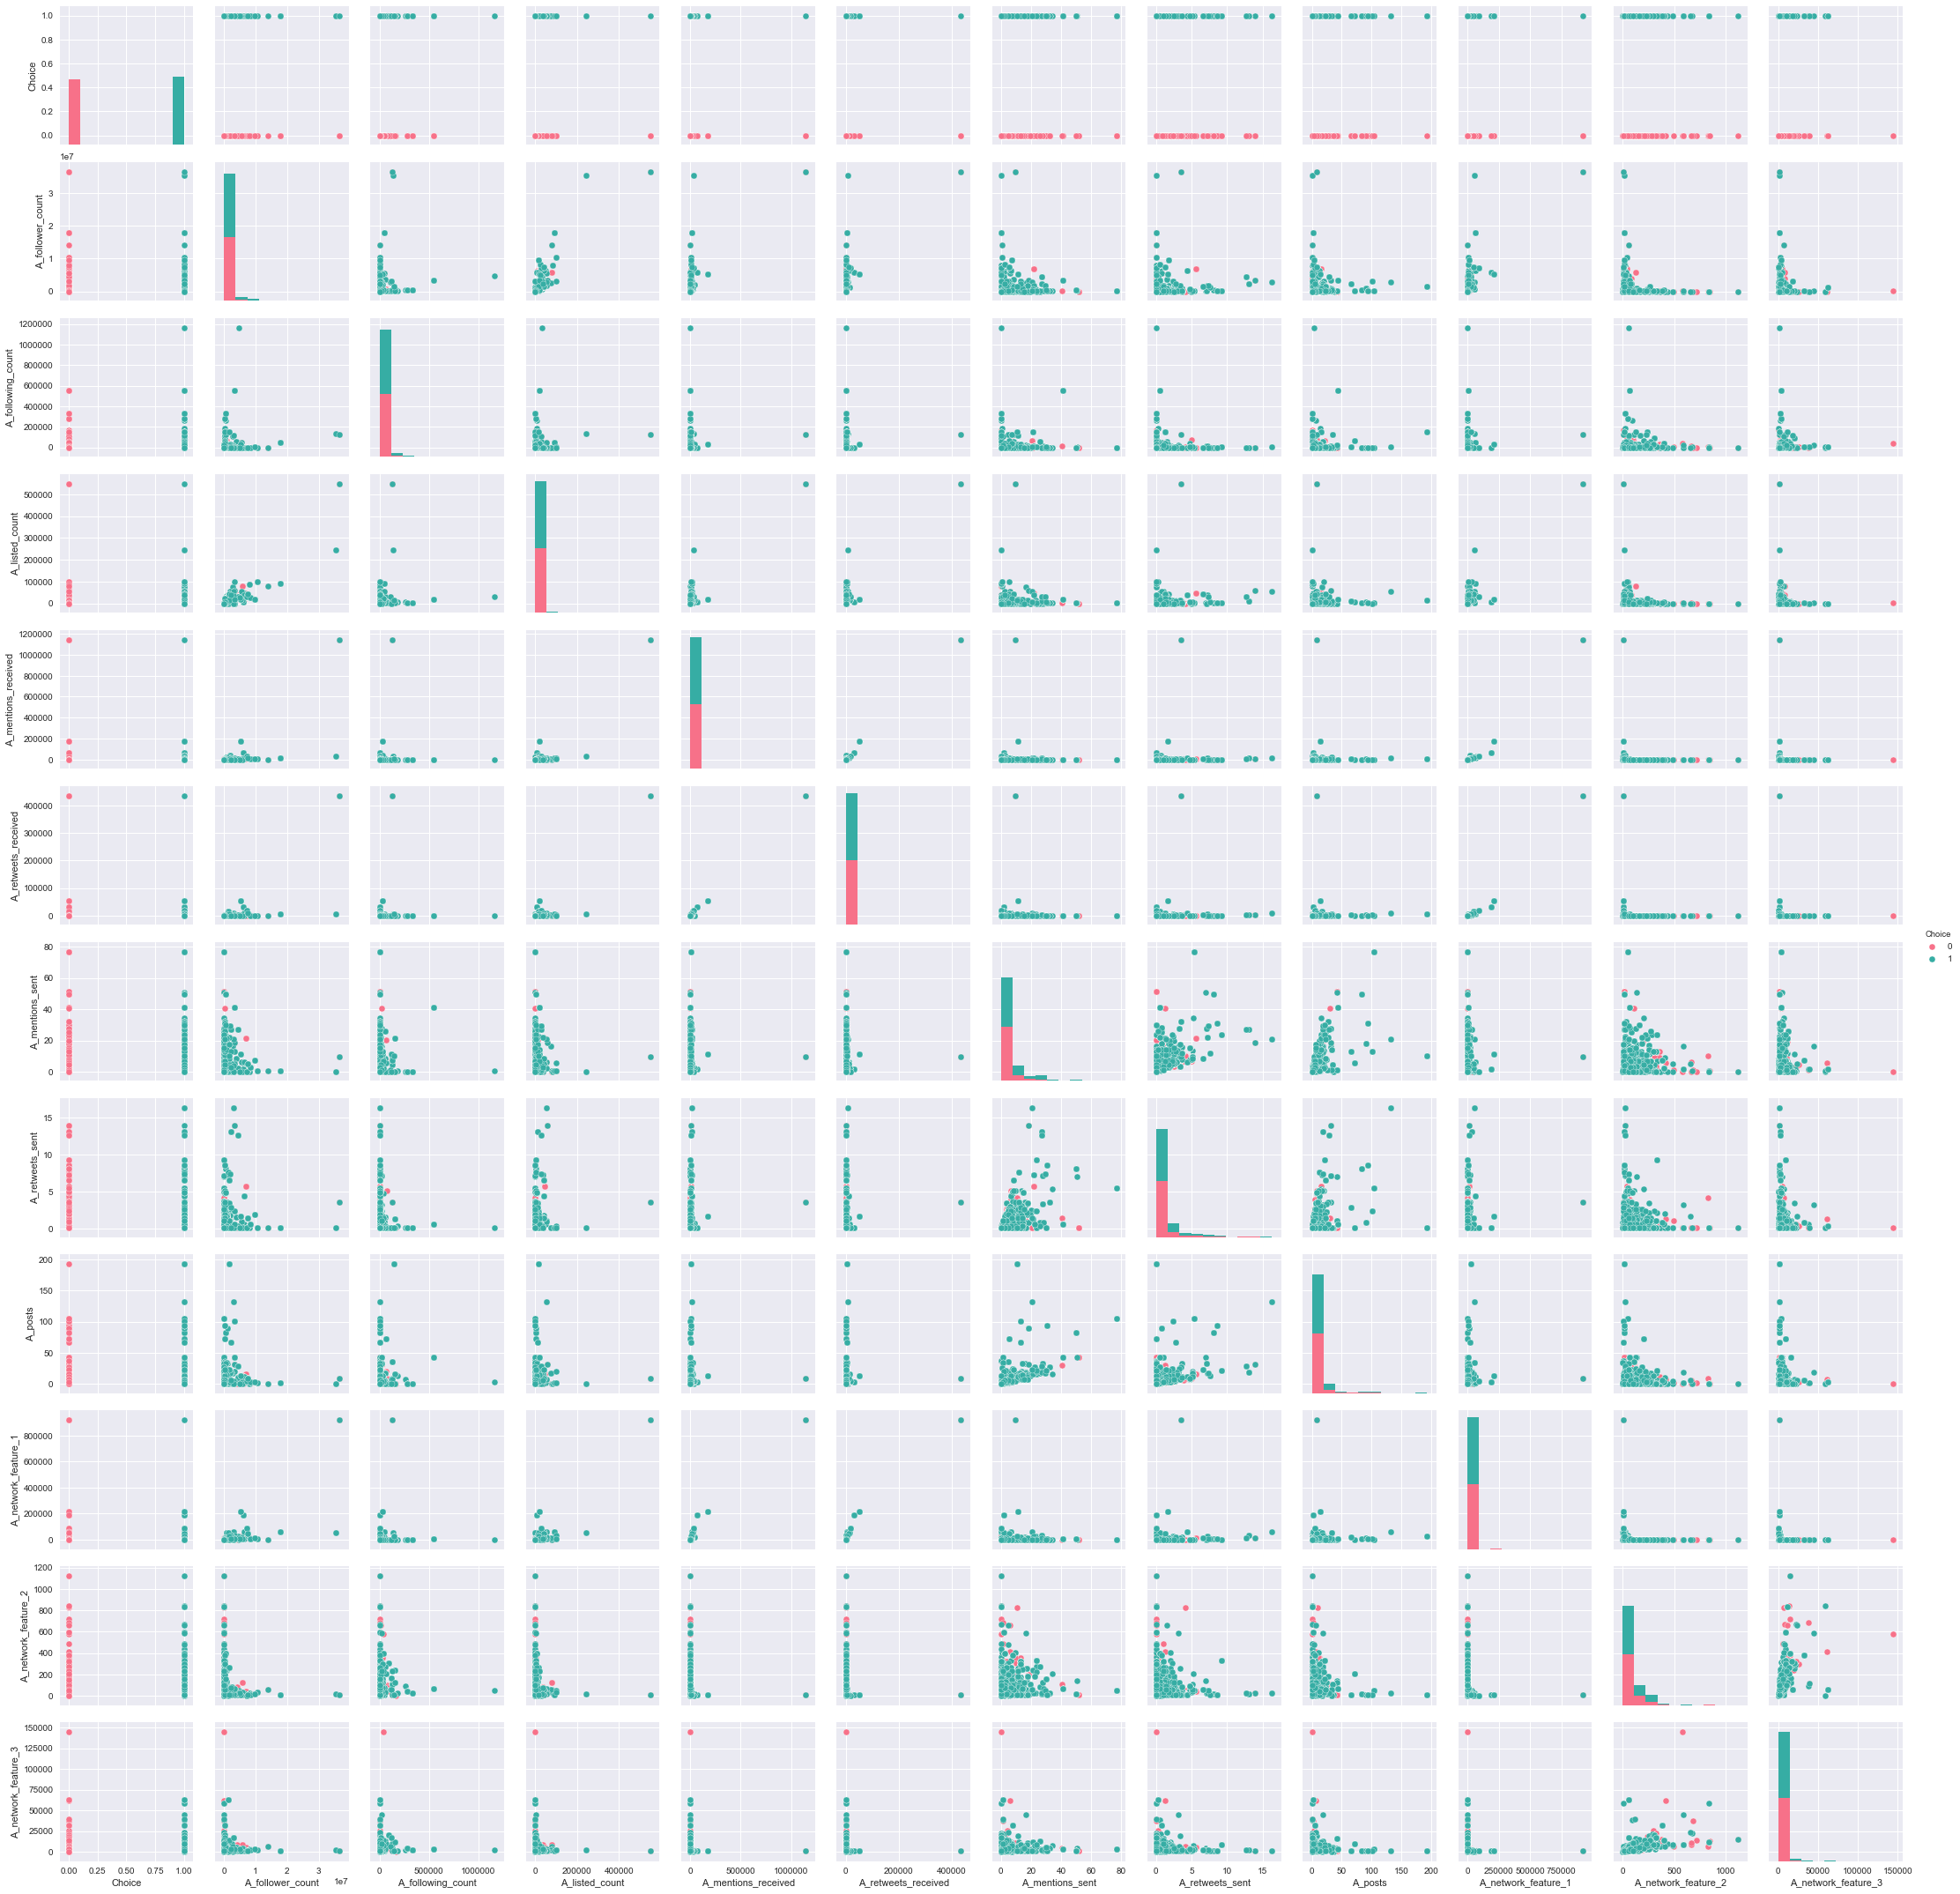

In [14]:
#Scatter plot for person A
sns.pairplot(data.iloc[:,:12], hue="Choice", palette="husl")

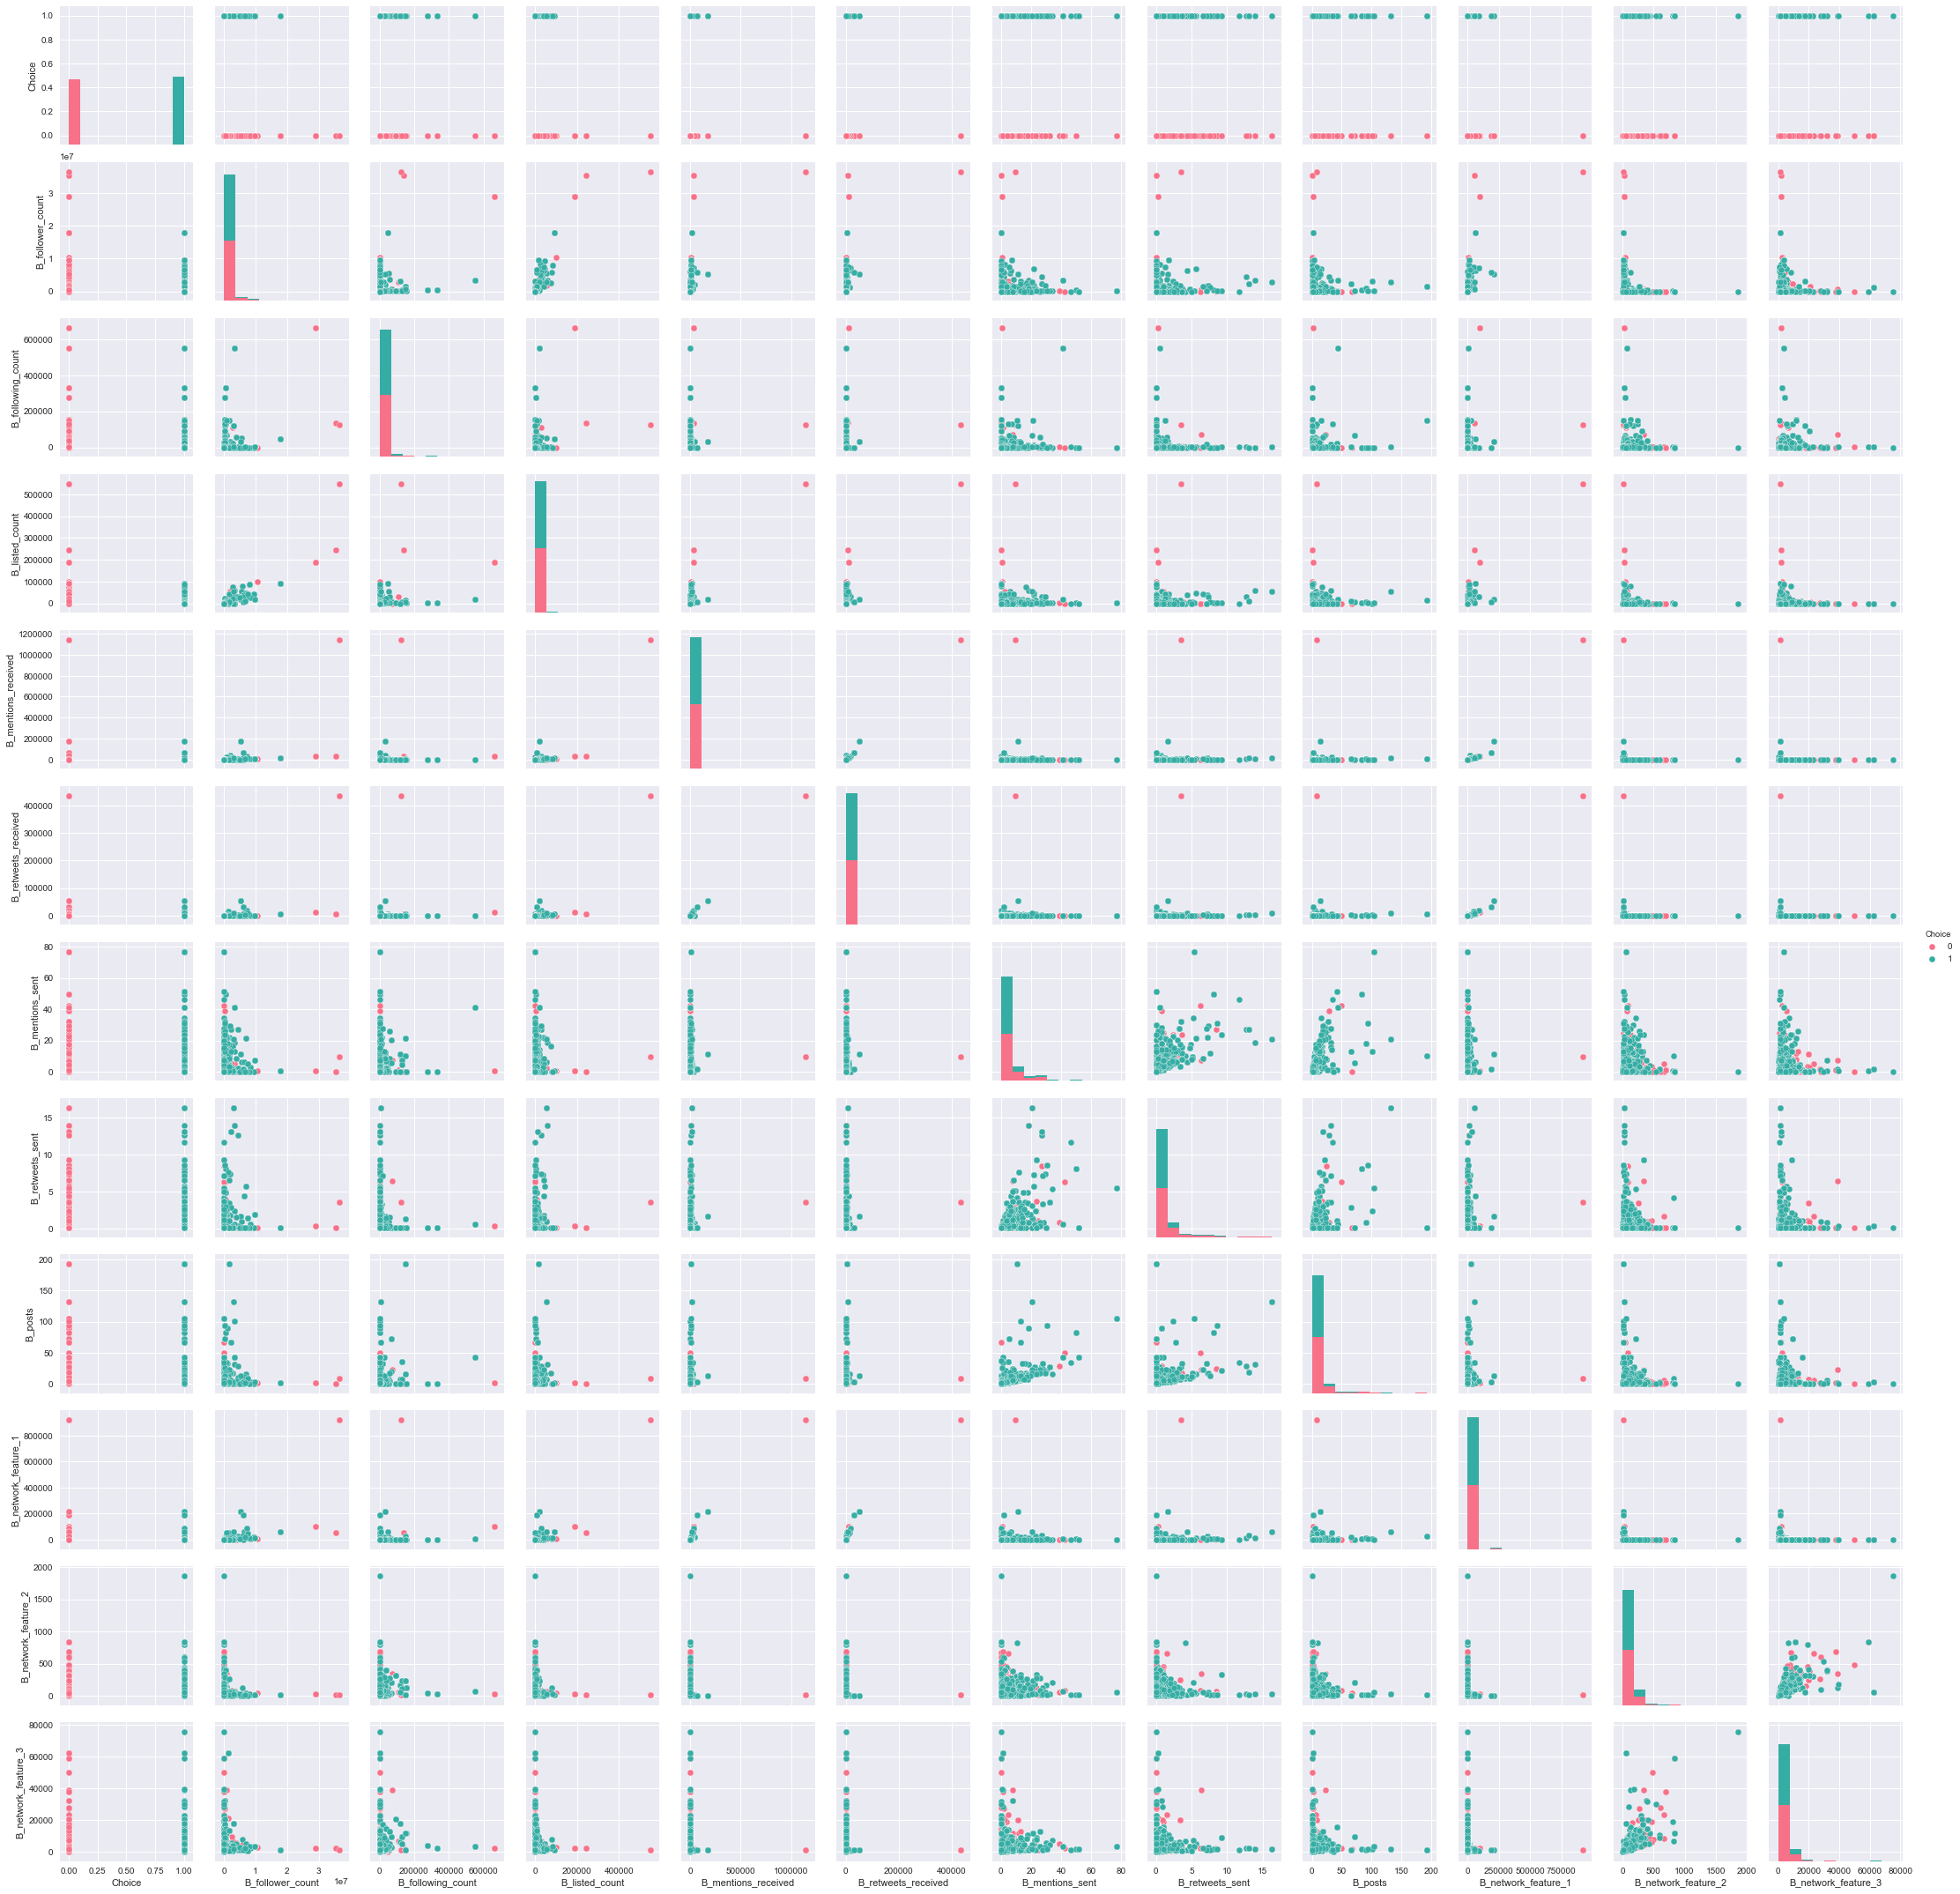

In [15]:
#Scatter plot for person B
sns.pairplot(pd.concat([data['Choice'], data.iloc[:,12:]], axis=1), hue="Choice", palette="husl")

In [14]:
#Checking dependent variable distribution
counts = data['Choice'].value_counts()
labels = ['1','0']

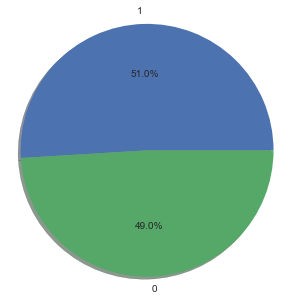

In [15]:
fig5, ax5 = plt.subplots(figsize=(5,5))
ax5.pie(counts, labels=labels, autopct='%1.1f%%', shadow=True)
ax5.axis('equal')
plt.show()

Equal distribution means no need to use stratification method in order to keep the same train-test distribution.

### Baseline Performance:

The performance of an untuned model over a raw data acts as a baseline performance. If possible, it is a good practice to check for a baseline performance of various models instead on focusing on one. Since this is a small and computationally inexpensive dataset, I will check a baseline performance of some popular classifier models. In spite of a given test data, I have devided the data into train and test set as given test set does not contain groundtruth values for  checking generalization capability of a model. I am also using a 10-fold cross validation to get the accurate performance measure.  

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [17]:
#Seperating dependent and independent variables from data
Y = np.asarray(data['Choice'])
X = data.drop(['Choice'],axis=1)

In [18]:
seed=4 # Setting seed value for reproducibility
# Spliting data into 90% training set and 10% test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=seed)

In [19]:

def get_model():
    models = []
    models.append(('LR' , LogisticRegression(solver='liblinear')))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('NB' , GaussianNB()))
    models.append(('SVM', SVC(probability=True, gamma='auto')))
    models.append(('GBC', GradientBoostingClassifier()))
    models.append(('RF' , RandomForestClassifier(n_estimators=100)))
    models.append(('MLP', MLPClassifier()))
    models.append(('LDA', LinearDiscriminantAnalysis()))
    return models

def base_line_performance(X_train, y_train,models):
    num_folds = 10
    scoring = 'accuracy'
    results = []
    names = []
    for name, model in models:
        kfold = KFold(n_splits=num_folds, random_state=seed)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        print('{}: {:.4} ({:.4})'.format(name, cv_results.mean(), cv_results.std()))
        
    return names, results

In [20]:
models = get_model()
names,results = base_line_performance(X_train, y_train,models)

LR: 0.7431 (0.01598)
KNN: 0.7355 (0.01039)
NB: 0.5576 (0.02136)
SVM: 0.508 (0.02137)
GBC: 0.7769 (0.02394)
RF: 0.7626 (0.02054)
MLP: 0.6738 (0.06967)
LDA: 0.7152 (0.02552)



Tree based models(GradientBoosting and RandomForest) has the highest baseline performance. This is expected as they are independent of scaling and the fact that our data heavily suffers from outliers.


### Data Preprocessing:
    
Now that a baseline performance is known, it is time to improve it by using feature scaling or transformation.


In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import Normalizer

# Function for feature scaling and transformation
def feature_transform(fn_name, data):
    #Create scaling or transformation object based on user input
    if fn_name == 'standard':
        tran_fn = StandardScaler()
    elif fn_name =='minmax':
        tran_fn = MinMaxScaler()
    elif fn_name =='log':
        tran_fn = FunctionTransformer(np.log1p, validate=True)
    elif fn_name =='normalize':
        tran_fn = Normalizer()
    
    #Applying transformation
    transfx_data = tran_fn.fit_transform(data.astype(float))
    #Converting back to dataframe 
    transfx_data = pd.DataFrame(transfx_data, columns = data.columns)
    
    return transfx_data

In [22]:
#Applying different scaling and log transformation 
X_train_minmax = feature_transform('minmax',X_train)
X_train_standard = feature_transform('standard',X_train)
X_train_norm = feature_transform('normalize',X_train)
X_train_log = feature_transform('log',X_train)

In [23]:
#Checking model performance after minmax scaling
names,results_minmax = base_line_performance(X_train_minmax, y_train,models)

LR: 0.6806 (0.03297)
KNN: 0.6988 (0.03196)
NB: 0.568 (0.02265)
SVM: 0.6171 (0.02632)
GBC: 0.7756 (0.02071)
RF: 0.7595 (0.02464)
MLP: 0.7526 (0.01856)
LDA: 0.7152 (0.02552)


In [24]:
#Checking model performance after Standard scaling
names,results_standard = base_line_performance(X_train_standard, y_train,models)

LR: 0.7311 (0.02235)
KNN: 0.7205 (0.02134)
NB: 0.568 (0.02265)
SVM: 0.7386 (0.0271)
GBC: 0.776 (0.02386)
RF: 0.7609 (0.02172)
MLP: 0.7516 (0.0175)
LDA: 0.7152 (0.02552)


In [25]:
#Checking model performance after Normalization
names,results_norm = base_line_performance(X_train_norm, y_train,models)

LR: 0.7504 (0.0118)
KNN: 0.727 (0.01573)
NB: 0.7444 (0.01529)
SVM: 0.7493 (0.013)
GBC: 0.7698 (0.01688)
RF: 0.7671 (0.01587)
MLP: 0.7566 (0.01636)
LDA: 0.7518 (0.01483)


In [26]:
#Checking model performance after Log transformation
names,results_log = base_line_performance(X_train_log, y_train,models)

LR: 0.7704 (0.02083)
KNN: 0.7516 (0.02064)
NB: 0.7599 (0.02283)
SVM: 0.7688 (0.0232)
GBC: 0.7769 (0.02394)
RF: 0.7628 (0.02316)
MLP: 0.7648 (0.02422)
LDA: 0.7682 (0.02181)



It seems like log transformation is the clear winner. This mainly due to the fact that log transformation changes the distributions of long tailed data. Let's check it's data distribution. 

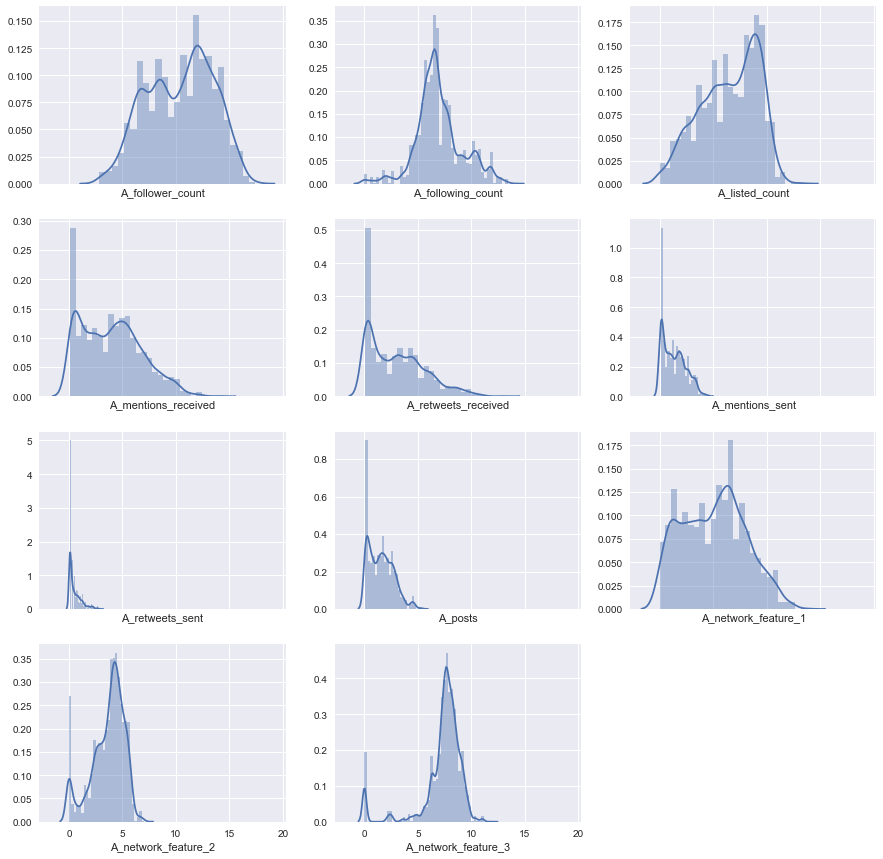

In [27]:
#plotting log transform data distribution for user A
distribution_plots(4,3, X_train_log.iloc[:,:11])

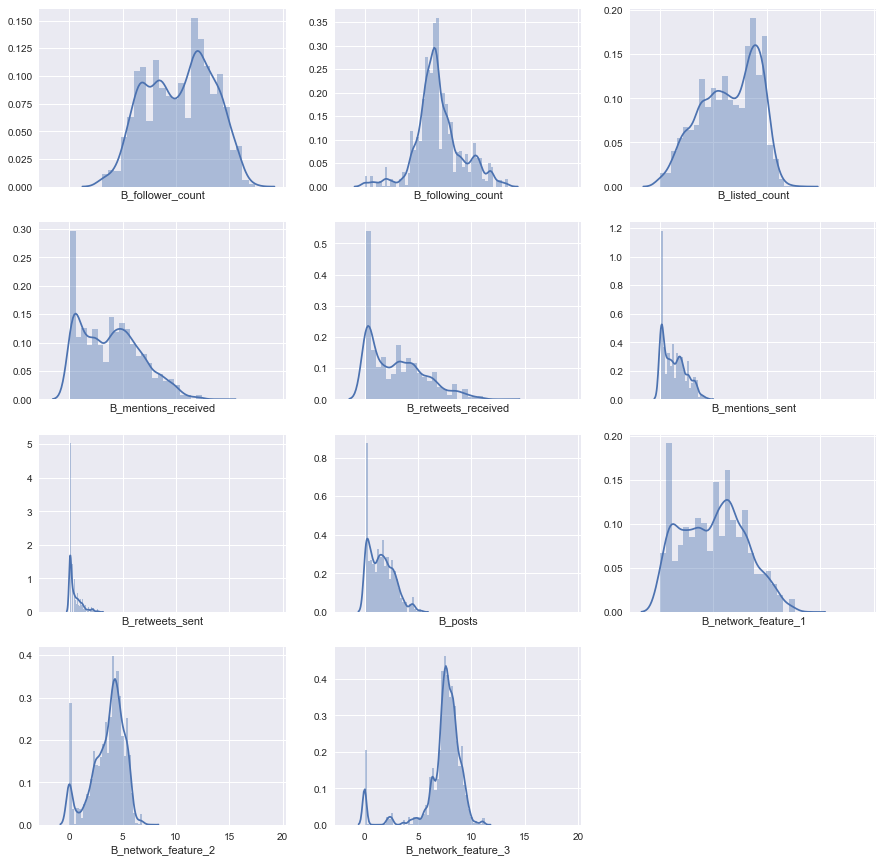

In [28]:
#plotting log transform data distribution for user A
distribution_plots(4,3, X_train_log.iloc[:,11:])

### Feature Engineering and Feature Selection:


#### Feature Engineering:
Feature engineering means presenting the available information in more useful way so that model could benefit from it. This includes reducing the number of features in more abstract way using algoriths such as PCA or hand crafting more complex features from already available ones using domain knowledge.   

There is no need to use PCA for such a small number of features. But I have created 4 more features.
The goal of the model is to predict the human judgement about social media influence. One of the main factor to have an effect on this decision would be a number of followers. Because more follower means more people are reading that person's post which will have some impact(it may be positive or negative) on people's opinion.
So binary variables 'A_is_popular' and 'B_is_popular' are created which has a value of 1 if a person has more than 1000000 followers or 0 otherwise.

Second feature is created by deviding a follower count from following count. Larger the number of this division, larger is that person's following count compared to follower count. This means instead of that person having an impact on others, others will an impact on him/her. 



In [29]:
#Creating a new binary feature based on follower count
##assigning 1 if a person has more than a million follower
data['A_is_popular'] =  [1 if x >= 1000000 else 0 for x in data['A_follower_count']]
data['B_is_popular'] =  [1 if x >= 1000000 else 0 for x in data['B_follower_count']]

#Creating new feature by deviding a follower count from following count
data['A_popularity_score'] = data['A_following_count'].divide(data['A_follower_count'])
data['B_popularity_score'] = data['B_following_count'].divide(data['B_follower_count'])


In [30]:
X = data.drop(['Choice'],axis=1)
# Spliting data into 90% training set and 10% test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=seed)

In [31]:
X_train_log = feature_transform('log',X_train)
names,results_log = base_line_performance(X_train_log, y_train,models)

LR: 0.7704 (0.02181)
KNN: 0.7518 (0.01957)
NB: 0.7626 (0.02493)
SVM: 0.7706 (0.02334)
GBC: 0.7746 (0.02476)
RF: 0.7659 (0.02336)
MLP: 0.77 (0.01945)
LDA: 0.7713 (0.02108)


This actually improved the performance on all models except MLP and LDA.

#### Feature Selection:

Feature selection means selecting the best possible features which are already availble to us. It can be done by applying various stastical methods on features or by using the 'L1' regularization in the model. Here I have used SelectKBest class and Recursive Feature Elemination by RFE class.  


In [32]:
#Checking 6 Least important features using Univariate Selection
from sklearn.feature_selection import SelectKBest, chi2
test = SelectKBest(chi2, k=20)
test.fit_transform(X_train_log, y_train)
index=sorted(range(len(test.scores_)), key=lambda k: test.scores_[k])[0:6]
X_train_log.columns[index]


Index(['B_following_count', 'A_following_count', 'B_network_feature_2',
       'A_retweets_sent', 'A_network_feature_2', 'A_is_popular'],
      dtype='object')

In [33]:
X_train_log.head()

,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,A_network_feature_2,...,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3,A_is_popular,B_is_popular,A_popularity_score,B_popularity_score
0,12.492784,7.373374,8.815073,6.495110,5.697397,3.376153,0.609593,3.078356,7.773594,4.210586,...,0.288756,0.095768,0.448962,0.693147,4.532599,7.170120,0.000000,0.000000,0.005958,0.840857
1,14.290217,4.543295,9.197964,5.967513,5.387374,0.307142,0.095768,0.615072,7.442493,2.395987,...,2.566623,2.147759,2.624116,8.121777,2.402310,7.191311,0.693147,0.693147,0.000058,0.000267
2,8.939319,8.710784,6.171701,2.679952,1.629531,1.709745,0.095768,1.563081,3.951244,4.893607,...,0.447466,0.095768,0.459802,2.302585,4.462069,7.611568,0.000000,0.000000,0.585379,0.052580
3,8.041413,8.081166,3.871201,1.634130,1.272877,0.095768,0.095768,0.746246,2.890372,1.791759,...,0.095768,0.095768,0.295929,0.000000,0.000000,0.000000,0.000000,0.000000,0.713228,0.249563
4,6.950815,4.406719,3.713572,1.313262,0.658793,0.095768,0.095768,0.095768,2.397895,3.113515,...,0.095768,0.095768,0.301467,5.666427,2.688521,6.638063,0.000000,0.693147,0.074793,0.000756


In [34]:
#Checking 6 Least important features for non-tree based models using Recursive Feature Elemination
from sklearn.feature_selection import RFE
estimator = LogisticRegression(solver='liblinear')
selector = RFE(estimator, 20, step=1)
selector = selector.fit(X_train_log, y_train)
index=list(np.where(selector.support_== 0))
X_train_log.columns[index]

Index(['A_following_count', 'A_retweets_received', 'A_mentions_sent',
       'B_follower_count', 'B_following_count', 'B_network_feature_3'],
      dtype='object')

(-1, 26)

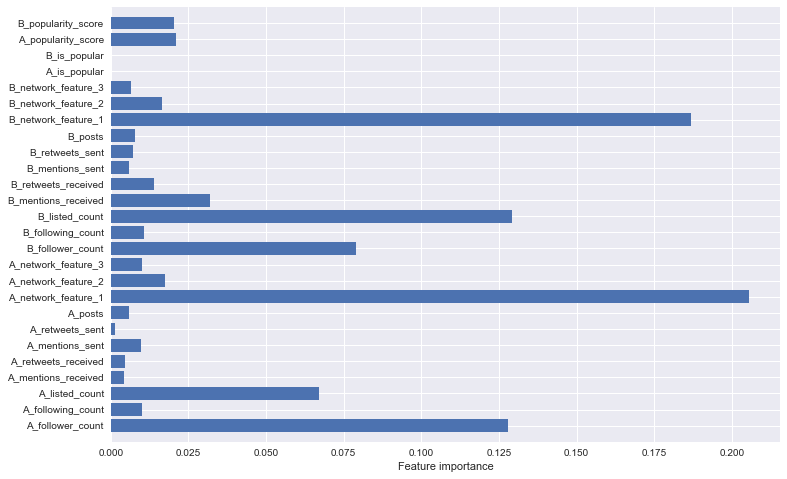

In [40]:
#Checking important feature for tree based models using feature importance attribute 
estimator = GradientBoostingClassifier()
estimator.fit(X_train_log, y_train)
n_features = X_train_log.shape[1]
plt.figure(figsize=(12,8))
plt.barh(range(n_features), estimator.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train_log.columns)
plt.xlabel("Feature importance")
plt.ylim(-1, n_features)


I have decided to remove 'A_following_count' and 'B_following_count' features as both univariate selection and recursive feature elemination method have selected them as least important feature. They even have low scores for tree based models.    

In [18]:
#Removing least important features
cols = ['A_following_count','B_following_count']
data = data.drop(cols,axis=1)

In [19]:
X = data.drop(['Choice'],axis=1)
# Spliting data into 90% training set and 10% test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=seed)

In [20]:
X_train_log = feature_transform('log',X_train)
names,results_log = base_line_performance(X_train_log, y_train,models)

LR: 0.7706 (0.02094)
KNN: 0.7444 (0.01597)
NB: 0.7611 (0.02527)
SVM: 0.7684 (0.02005)
GBC: 0.7766 (0.0268)
RF: 0.7615 (0.02605)
MLP: 0.7702 (0.01816)
LDA: 0.7742 (0.02068)



It is generally a good idea to come back to this stage after final model selection and iterate through these steps for that perticular model.

### Model Tuning:

All the above results are for model with default parameter. After careful seletion of features it is always important to fine tune the model. Here I have used a gridsreach method to find the best hyperparameters from a given set. 

In [21]:
from sklearn.model_selection import GridSearchCV
class GridSearch(object):
    
    def __init__(self,X_train,y_train,model,hyperparameters):
        self.X_train = X_train
        self.y_train = y_train
        self.model = model
        self.hyperparameters = hyperparameters
        
    def GridSearch(self):
        cv = 10
        clf = GridSearchCV(self.model,self.hyperparameters,cv=cv,n_jobs=-1)
        # Fit randomized search
        best_model = clf.fit(self.X_train, self.y_train)
        print("Best: {:.4} using {}".format(best_model.best_score_,best_model.best_params_))
        return best_model,best_model.best_params_
    
    def best_model_pridict(self,X_test):
        best_model, best_param = self.GridSearch()
        pred = best_model.predict(X_test)
        return pred,best_param

In [22]:
# Applying log transform to test data
X_test_log = feature_transform('log',X_test)

In [46]:
#Applying grisearch for losgistic regression model
model_LR = LogisticRegression()
r=np.random.uniform(-2,1,20)
#Hyperparameters to test
param_LR = {'penalty':['l1','l2'],
            'C':10**r}

LR_gridsearch = GridSearch(X_train_log,y_train,model_LR,param_LR)
pred_LR,best_param_LR = LR_gridsearch.best_model_pridict(X_test_log)

Best: 0.7733 using {'penalty': 'l1', 'C': 0.22464063247728364}


In [47]:
model_KNN = KNeighborsClassifier()
neighbors = [4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
param_KNN = {'n_neighbors':neighbors}

KNN_gridsearch = GridSearch(X_train_log,y_train,model_KNN,param_KNN)
pred_KNN,best_param_KNN = KNN_gridsearch.best_model_pridict(X_test_log)

Best: 0.7675 using {'n_neighbors': 20}


In [37]:
model_GBC = GradientBoostingClassifier()
r=np.random.uniform(-3,1,30)
param_GBC = {'learning_rate':10**r,
             'n_estimators':[100,200,300],
             'max_depth': [3,4,5]}
GBC_gridsearch = GridSearch(X_train_log,y_train,model_GBC,param_GBC)
pred_GBC,best_param_GBC = GBC_gridsearch.best_model_pridict(X_test_log)

Best: 0.7791 using {'max_depth': 4, 'n_estimators': 100, 'learning_rate': 0.02212120689305131}


In [49]:
model_RF=RandomForestClassifier()
param_RF = {'n_estimators':[100,200,250],
            'max_depth': [6,7,8,9]}
RF_gridsearch = GridSearch(X_train_log,y_train,model_RF,param_RF)
pred_RF,best_param_RF = RF_gridsearch.best_model_pridict(X_test_log)

Best: 0.7785 using {'n_estimators': 100, 'max_depth': 6}


Usually it is better to use an ensemble model which will combines all fine tune models to make the final predictions. But for this problem I need to calculate auc and require probabilities of the indivisual classes. This is little bit difficult to do using ensemble model. So here I have used Gradient Boosting classifier which has showed best results so far. (I tried doing gridsearch for SVC and MLP but apparently they are taking a lot of time which unfortunatly I don't have. I belive with proper hyperparameters Neural Network can provide better results than gradient boosting)

In [38]:
#Creating GradientBoosting model with best parameters
final_model = GradientBoostingClassifier(**best_param_GBC)
final_predictor = final_model.fit(X_train_log,y_train)
print('Accuracy on train: ',final_predictor.score(X_train_log,y_train))
print('Accuracy on test:' , final_predictor.score(X_test_log,y_test))

Accuracy on train:  0.8091492444628441
Accuracy on test: 0.750465549348231


This is a quite a improvement from a baseline performance. The difference between train and test set is an indication of model overfitting and will require more fine tuning of parameters.  
Now since the model is finalized it's time check for given test set performance. Let's first train the model on complete dataset without test train split. 

In [39]:
from sklearn import metrics

In [40]:
#Applying log transform to whole training data
X_log = feature_transform('log',X)

In [41]:
# Calculating whole training data performance and AUC  
final_predictor = final_model.fit(X_log,Y)
pred = final_predictor.predict_proba(X_log)
print('Accuracy on whole training data: ',final_predictor.score(X_log,Y))
fpr, tpr, _ = metrics.roc_curve(Y, pred[:,1:2], pos_label=1)
auc = metrics.auc(fpr,tpr)
print('AUC: ',auc)

Accuracy on whole training data:  0.8055141579731744
AUC:  0.8946627567366999


In [42]:
# Loading given test data
test_filename = 'test.csv'
X_Test = pd.read_csv(test_filename)

In [43]:
#Adding hand crafted features to given test data
X_Test['A_is_popular'] =  [1 if x >= 1000000 else 0 for x in X_Test['A_follower_count']]
X_Test['B_is_popular'] =  [1 if x >= 1000000 else 0 for x in X_Test['B_follower_count']]

#Adding hand crafted features to given test data
X_Test['A_popularity_score'] = X_Test['A_following_count'].divide(X_Test['A_follower_count'])
X_Test['B_popularity_score'] = X_Test['B_following_count'].divide(X_Test['B_follower_count'])

In [44]:
#Removing selected features from given test data
X_Test=X_Test.drop(cols,axis=1)

In [45]:
#Checking if train and test data features are in same order
X.columns == X_Test.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [46]:
#Applying log transform to given test data
X_Test_log = feature_transform('log',X_Test)

In [47]:
pred_test = final_predictor.predict_proba(X_Test_log)
pred_test=pred_test[:,1:2]
pred_test

array([[0.36049716],
       [0.66743137],
       [0.09714327],
       ...,
       [0.59645998],
       [0.57078419],
       [0.39051039]])


### Conclusion:

It was an interesting problem. Data was almost perfect and data cleaning requirement was minimal. Data was extremely right skewed which greatly afftected the baseline performance of many non-tree based models. A simple log transformation of the data was managed to solve this problem and considerably improved the performance of those models. After which I attempted to further  improve that performance with feature engineering and selection. This had a different effect on different models. In the end, I fine tuned models using gridsearch method.

I had to rush through some part due to time constrained. If I had more time, I would have properly fine tuned final GradientBoosting model by going back to feature selection and iterating over few step. Also, it could have been an interesting task to analyze those results by finding a relation between misclassified data point from different models.       








Ended on: Sat Oct 20 23:32 2018